In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv(r'/content/cosmetics.csv')
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


In [ ]:
df.shape

(1472, 11)

In [ ]:
df.isnull().sum()

,0
Label,0
Brand,0
Name,0
Price,0
Rank,0
Ingredients,0
Combination,0
Dry,0
Normal,0
Oily,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


In [ ]:
df["Label"]

,Label
0,Moisturizer
1,Moisturizer
2,Moisturizer
3,Moisturizer
4,Moisturizer
...,...
1467,Sun protect
1468,Sun protect
1469,Sun protect
1470,Sun protect


In [ ]:
df.columns

Index(['Label', 'Brand', 'Name', 'Price', 'Rank', 'Ingredients', 'Combination',
       'Dry', 'Normal', 'Oily', 'Sensitive'],
      dtype='object')

In [ ]:
df['Label'].value_counts()

,count
Label,
Moisturizer,298
Cleanser,281
Face Mask,266
Treatment,248
Eye cream,209
Sun protect,170


In [ ]:
df.skew(axis=0,skipna=True,numeric_only=True)

,0
Price,2.638877
Rank,-3.911711
Combination,-0.658623
Dry,-0.469379
Normal,-0.639662
Oily,-0.440045
Sensitive,-0.054423


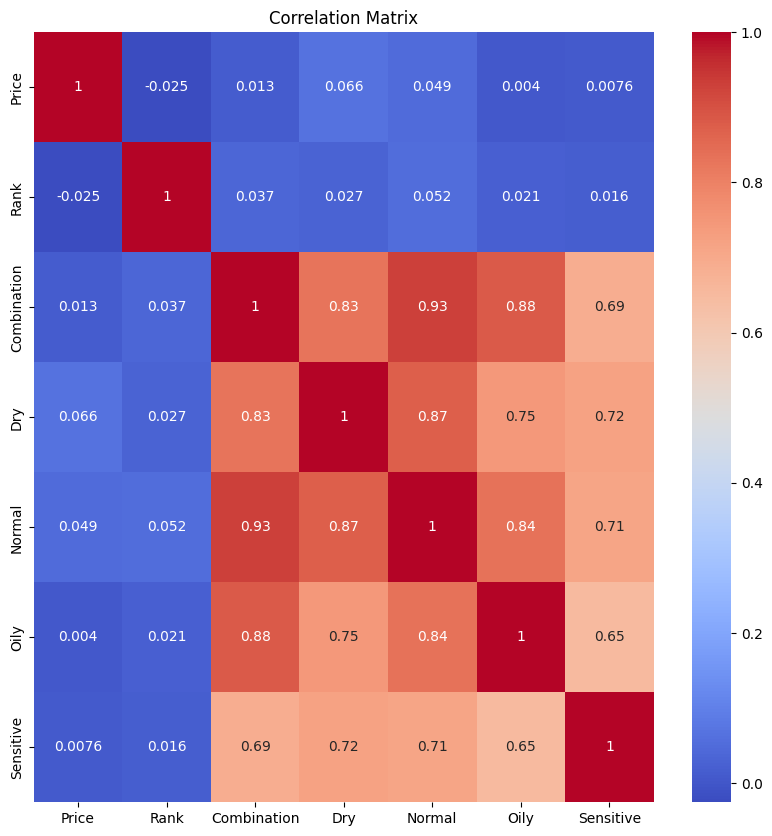

In [ ]:
df_corr = df.drop(['Label', 'Brand', 'Name', 'Ingredients'], axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
skin_type=['Combination','Dry','Normal','Oily','Sensitive']
df['SkinType_Code'] = df[skin_type].astype(str).agg(','.join, axis=1)
print(df[['Name', 'SkinType_Code']])


                                                   Name SkinType_Code
0                                       Crème de la Mer     1,1,1,1,1
1                              Facial Treatment Essence     1,1,1,1,1
2                            Protini™ Polypeptide Cream     1,1,1,1,0
3                           The Moisturizing Soft Cream     1,1,1,1,1
4         Your Skin But Better™ CC+™ Cream with SPF 50+     1,1,1,1,1
...                                                 ...           ...
1467  Yoghurt Nourishing Fluid Veil Face Sunscreen B...     1,1,1,1,1
1468  Daily Deflector™ Waterlight Broad Spectrum SPF...     0,0,0,0,0
1469                            Self Tan Dry Oil SPF 50     0,0,0,0,0
1470                   Pro Light Self Tan Bronzing Mist     0,0,0,0,0
1471  DERMAPROTECT Daily Defense Broad Spectrum SPF 50+     1,1,1,1,1

[1472 rows x 2 columns]


In [ ]:
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,SkinType_Code
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,"1,1,1,1,1"
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,"1,1,1,1,1"
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,"1,1,1,1,0"
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,"1,1,1,1,1"
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,"1,1,1,1,1"
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1,"1,1,1,1,1"
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0,"0,0,0,0,0"
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0,"0,0,0,0,0"
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0,"0,0,0,0,0"


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['SkinType_Code']=le.fit_transform(df['SkinType_Code'])
df

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive,SkinType_Code
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,23
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,23
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,22
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,23
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1,23
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0,0


/tmp/ipython-input-77574595.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x='SkinType_Code',hue='Label',shade = True)


<Axes: xlabel='SkinType_Code', ylabel='Density'>

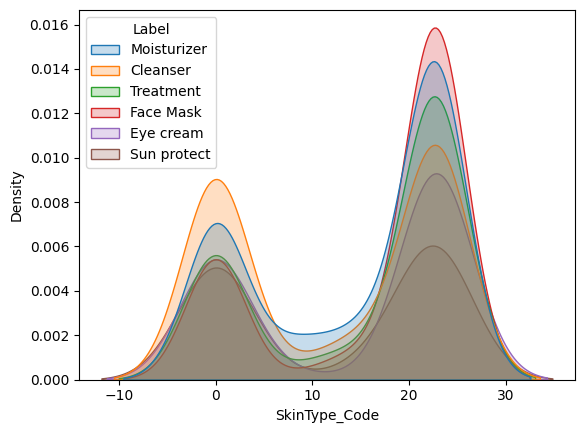

In [ ]:
sns.kdeplot(data=df,x='SkinType_Code',hue='Label',shade = True)

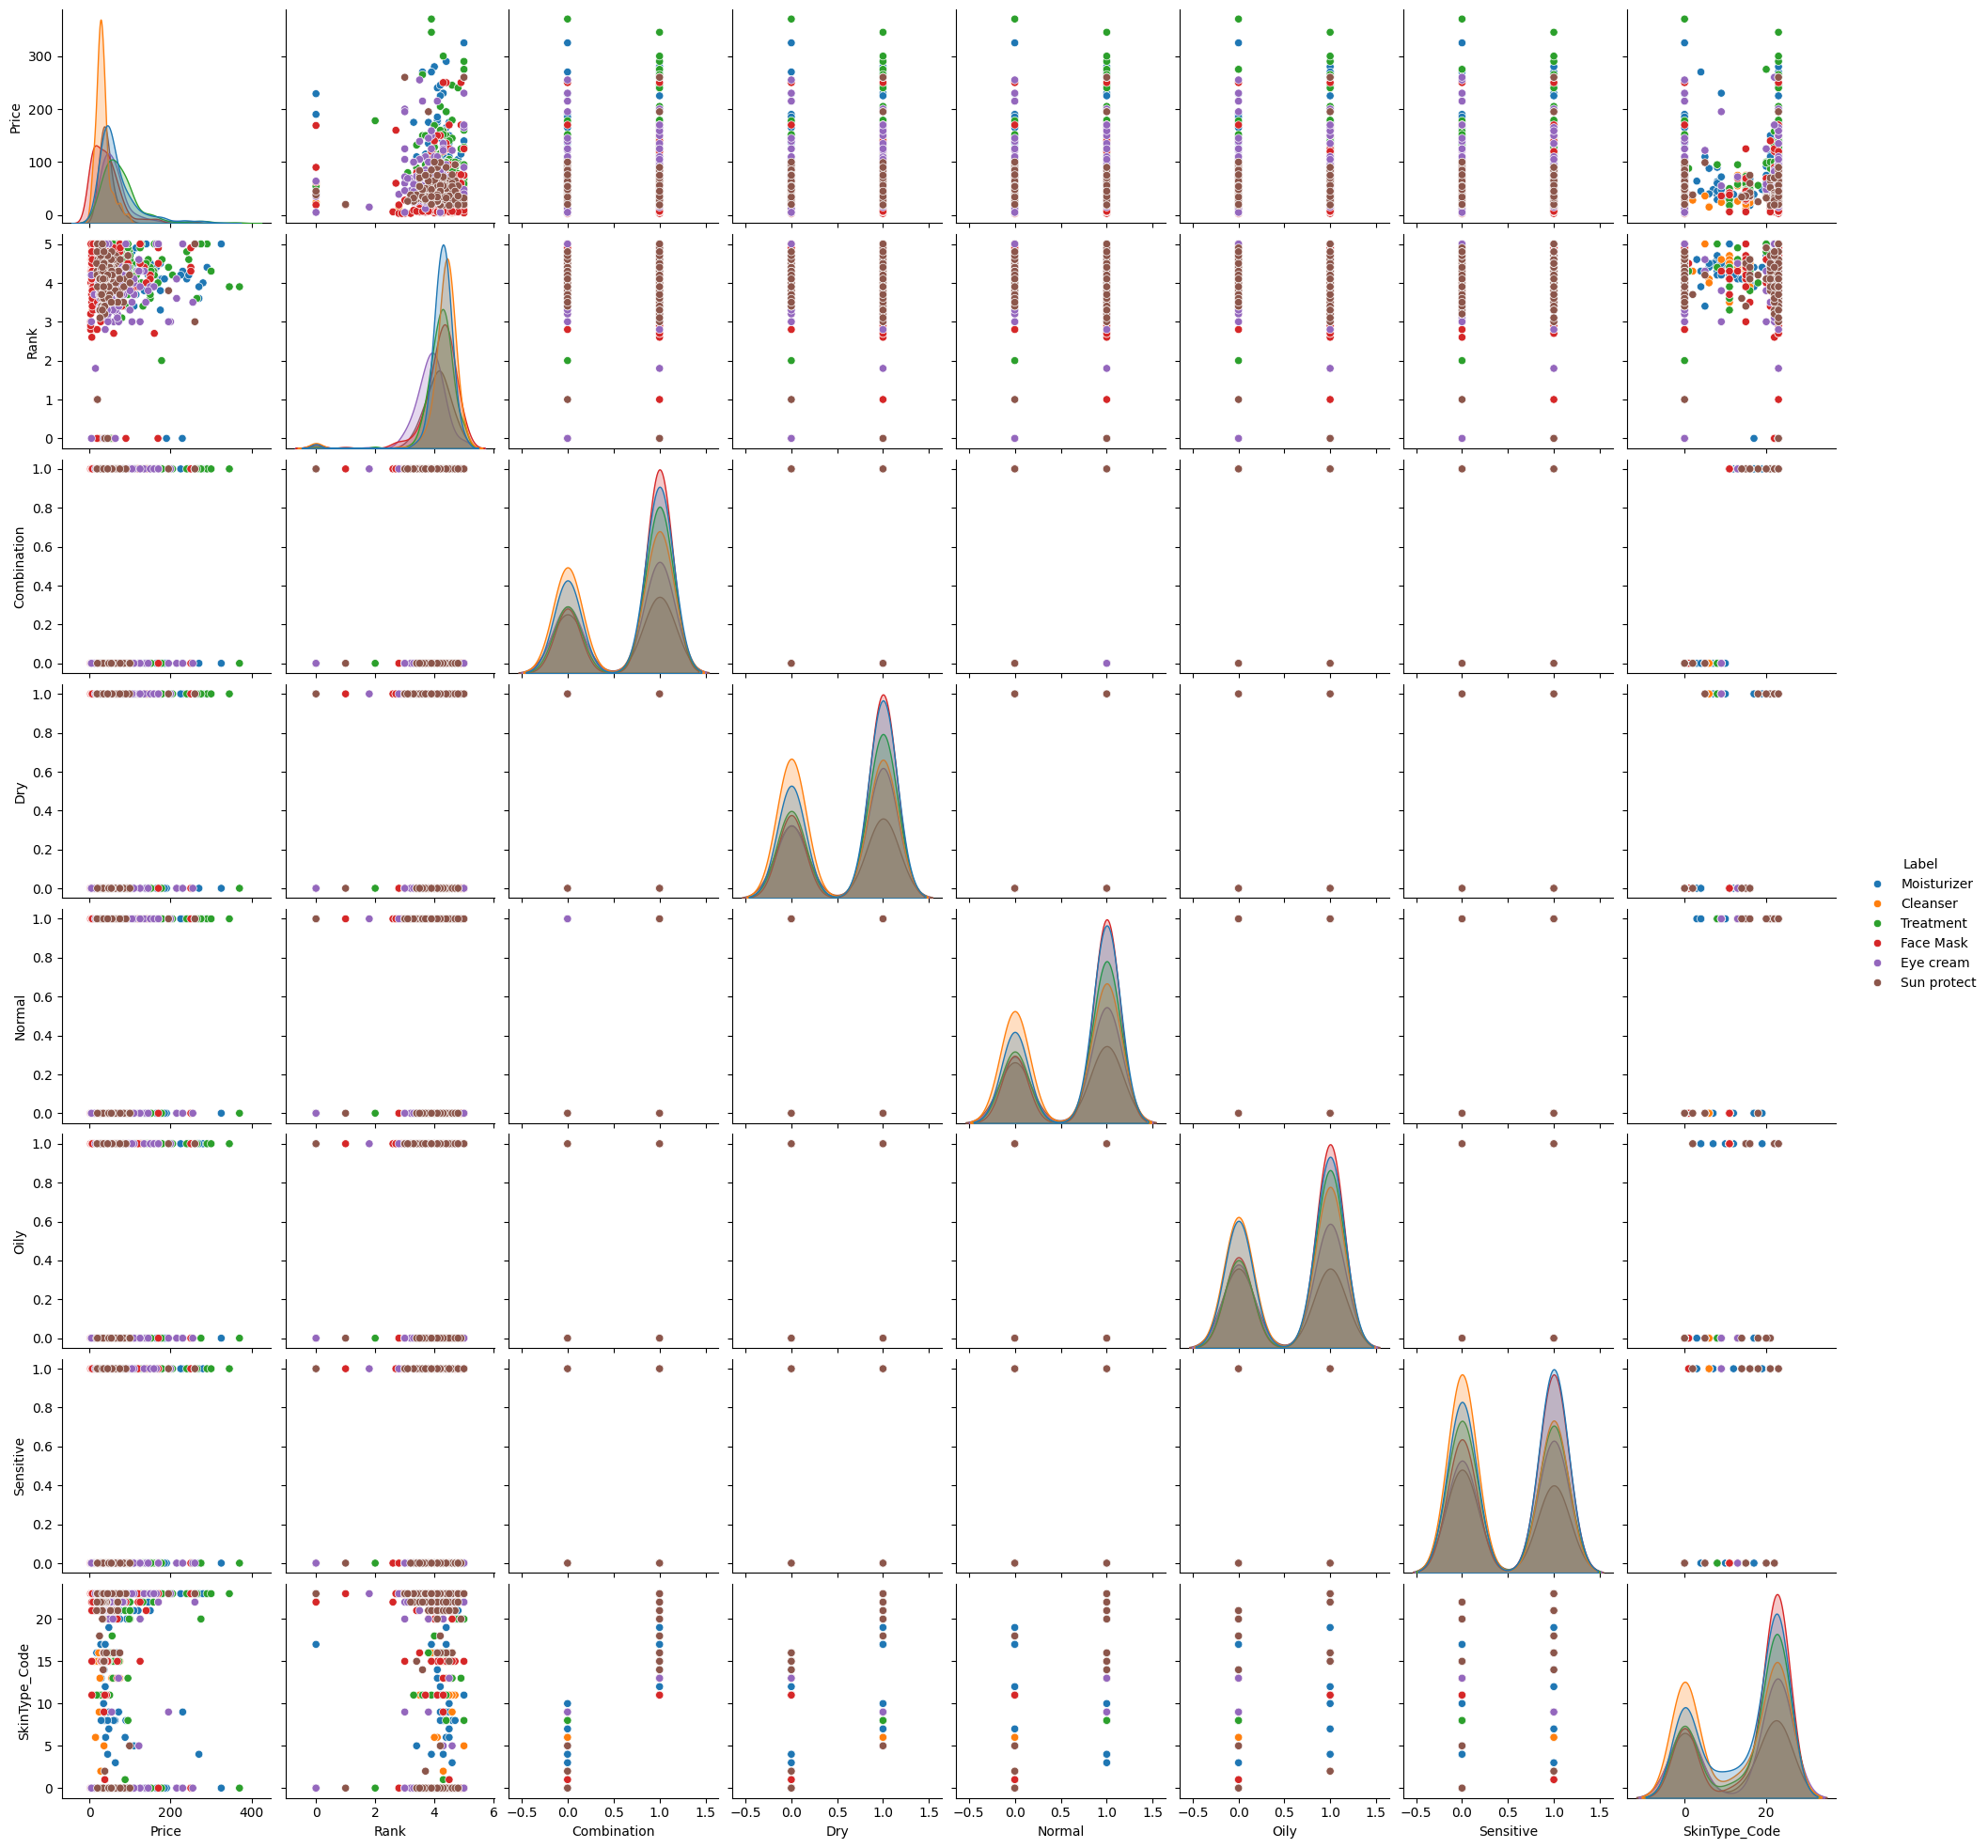

In [ ]:
sns.pairplot(df,hue='Label',diag_kind='kde')

<Axes: xlabel='SkinType_Code', ylabel='Label'>

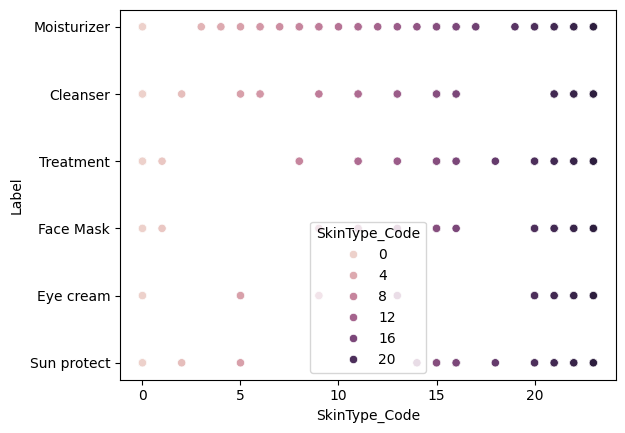

In [ ]:
sns.scatterplot(data = df, x='SkinType_Code', y='Label',hue = 'SkinType_Code')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = df
features = ['Price', 'Rank']
X = data[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


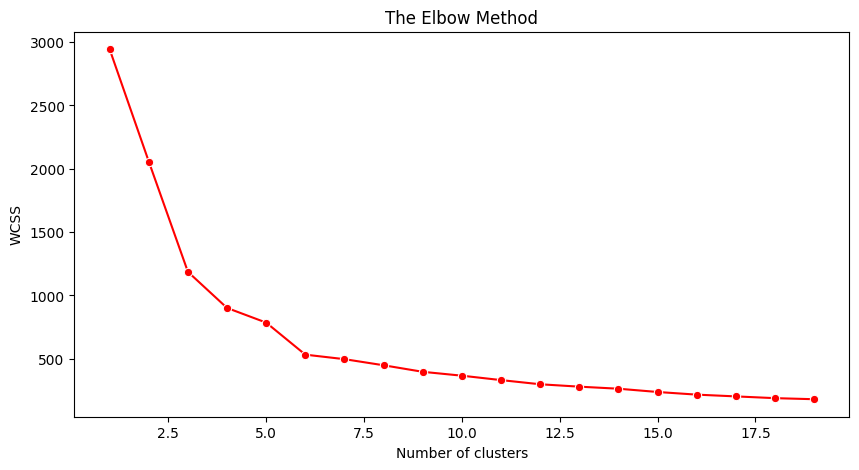

In [ ]:
wcss = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(x=range(1,20), y=wcss, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

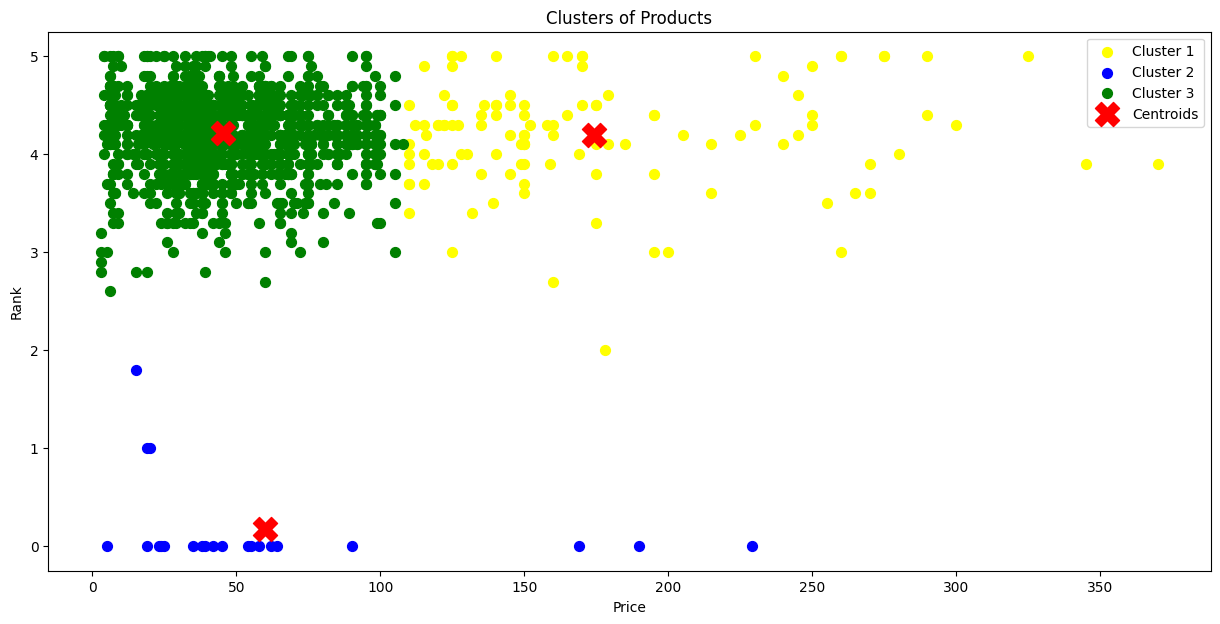

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_Kmeans = kmeans.fit_predict(X_scaled)

# Step 4: Add cluster labels to the original DataFrame
data['Cluster'] = y_Kmeans

# Step 5: Inverse transform centroids back to original Price and Rank
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

# Step 6: Plot clusters and centroids
plt.figure(figsize=(15, 7))
colors = ['yellow', 'blue', 'green']

# Plot each cluster
for i, color in zip(range(3), colors):
    subset = data[data['Cluster'] == i]
    plt.scatter(subset['Price'], subset['Rank'], color=color, label=f'Cluster {i+1}', s=50)

# Plot centroids
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, color='red', label='Centroids', marker='X')

# Labels and legend
plt.title('Clusters of Products')
plt.xlabel('Price')
plt.ylabel('Rank')
plt.legend()
plt.grid(False)
plt.show()


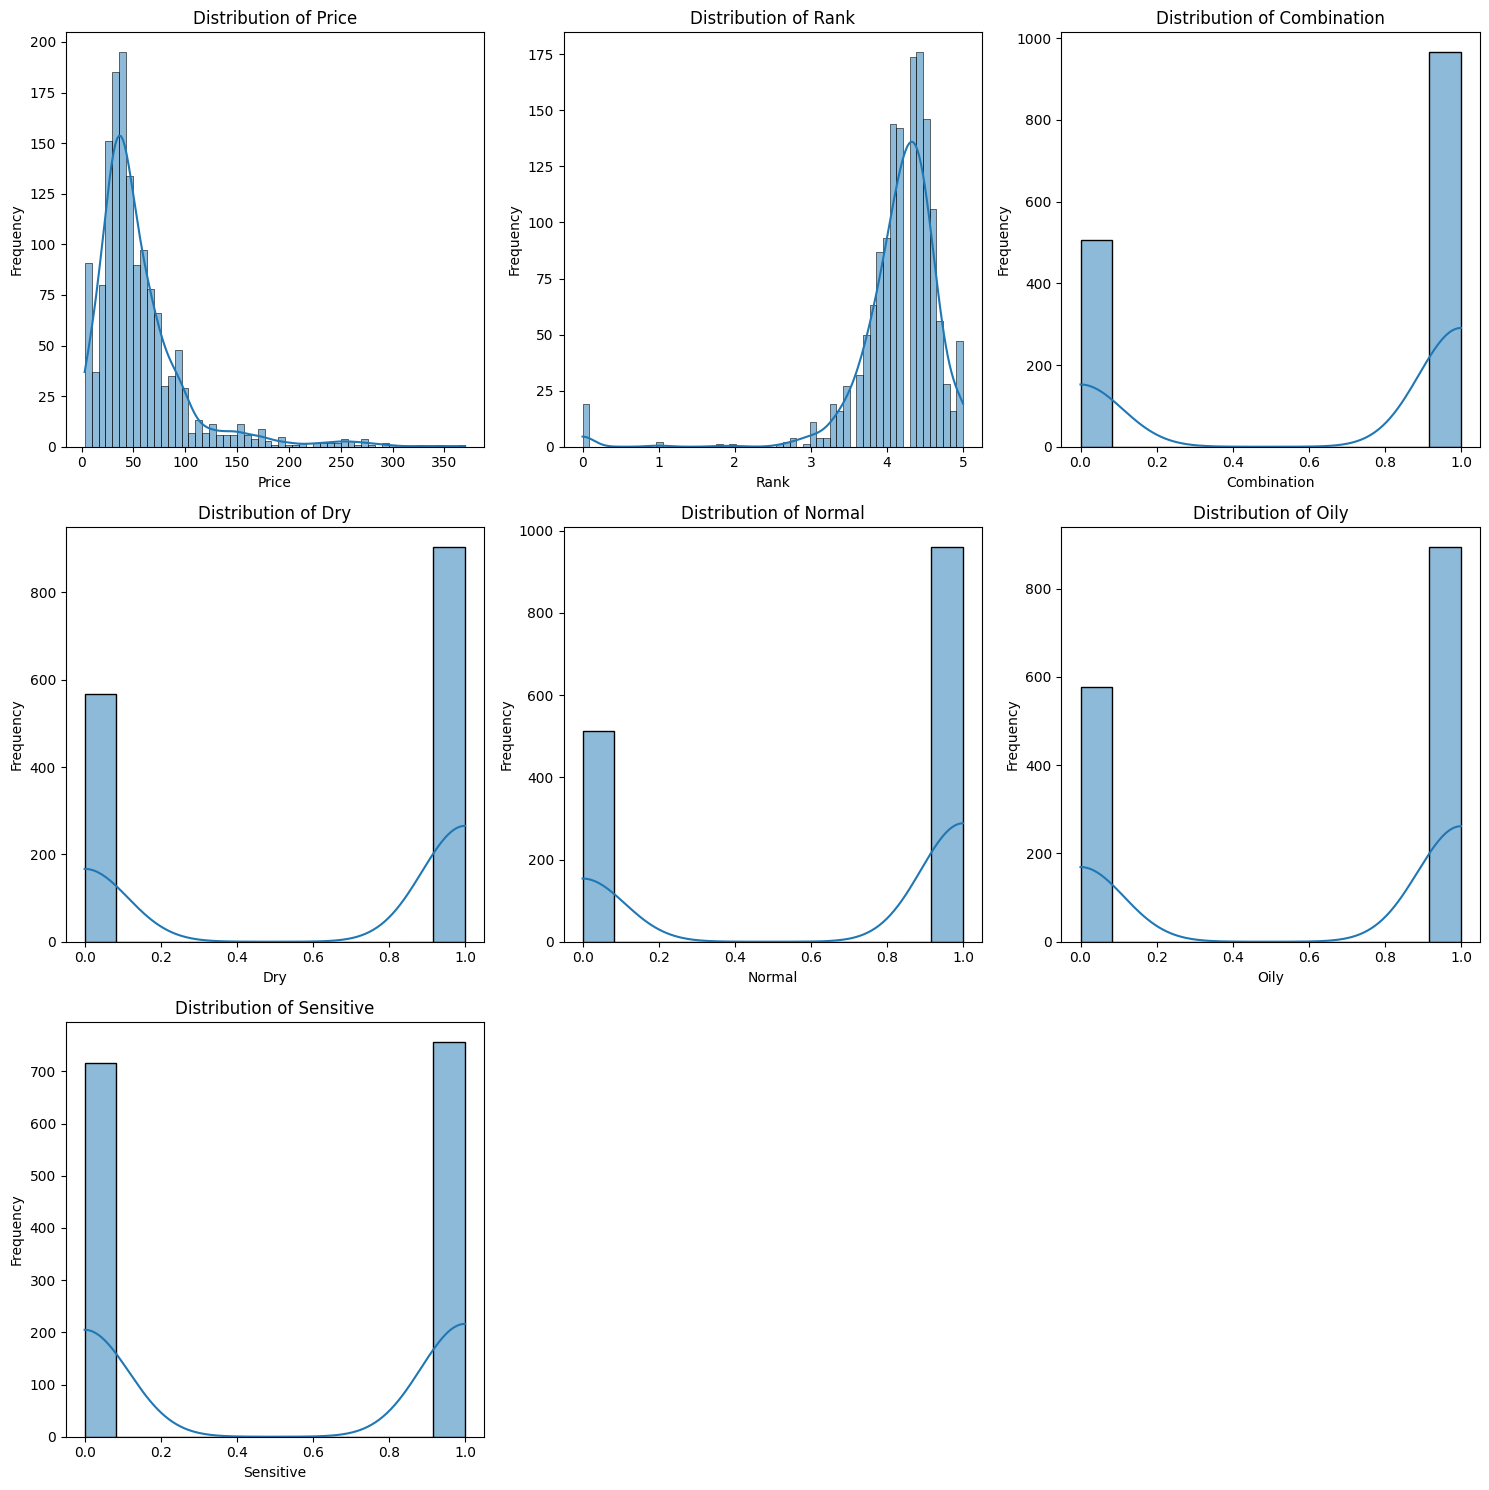

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('SkinType_Code')
numeric_cols.remove('Cluster')

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
  sns.histplot(data=df, x=col, kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ✅ Load dataset (already loaded in your case)
# df = pd.read_csv("cosmetics.csv")
df['Ingredients'] = df['Ingredients'].fillna("")

# TF-IDF for ingredients
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Ingredients'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend_products(user_skin, user_budget, liked_product=None):
    # Filter by skin type
    filtered = df[df[user_skin] == 1]

    # Filter by budget
    filtered = filtered[filtered['Price'] <= user_budget]

    # If user gave a liked product → recommend similar ones
    if liked_product:
        try:
            idx = df[df['Name'].str.contains(liked_product, case=False, na=False)].index[0]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            product_indices = [i[0] for i in sim_scores[1:11]]  # top 10 similar
            result = df.iloc[product_indices][['Name', 'Brand', 'Price', 'Rank']]

            # Filter again by skin + budget
            result = result[result['Price'] <= user_budget]
            result = result.reset_index(drop=True)

            if result.empty:
                return "No similar products found in your budget."
            else:
                result['SkinType'] = user_skin
                return result[['Name', 'SkinType', 'Price', 'Rank']].head(5)
        except:
            return "Product not found in dataset."

    # If no liked product given → return top ranked products
    filtered = filtered.sort_values(by='Rank', ascending=True)
    if filtered.empty:
        return "No products found for your skin type and budget."
    else:
        filtered['SkinType'] = user_skin
        return filtered[['Name', 'SkinType', 'Price', 'Rank']].head(5)

# --------------------------
# 🔹 User Input
# --------------------------
user_skin = input("Enter your skin type (Combination/Dry/Normal/Oily/Sensitive): ")
user_budget = int(input("Enter your budget (₹): "))
liked_product = input("Enter a product you like (or press Enter to skip): ")

print("\nRecommended Products for you:\n")
print(recommend_products(user_skin, user_budget, liked_product if liked_product else None))

In [ ]:
import numpy as np

# Add a hypothetical 'Average_User_Rating' column with random values between 3.0 and 5.0 for demonstration
# In a real application, this data would come from user reviews or ratings
np.random.seed(42) # for reproducibility
df['Average_User_Rating'] = np.random.uniform(3.0, 5.0, size=len(df))

display(df[['Name', 'Rank', 'Average_User_Rating']].head())

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("cosmetics.csv")
df.columns = df.columns.str.strip()  # clean column names if needed

# Function: Recommend products
def recommend_products(user_skin, user_budget):
    # Filter products suitable for selected skin type (1 = suitable)
    filtered = df[df[user_skin] == 1]

    # Filter by budget
    filtered = filtered[filtered['Price'] <= user_budget]

    # Sort by Rank (lower is better)
    filtered = filtered.sort_values(by='Rank', ascending=True)

    # Rename columns for nice output
    filtered = filtered.rename(columns={'Name': 'Product'})

    if filtered.empty:
        return "No products found for your skin type and budget."
    else:
        # Add SkinType column with the selected type
        filtered['SkinType'] = user_skin
        return filtered[['Product', 'SkinType', 'Price', 'Rank']].head(5)

user_skin = input("Enter your skin type (Combination/Dry/Normal/Oily/Sensitive): ")
user_budget = int(input("Enter your budget (₹): "))

print("\nRecommended Products for you:\n")
print(recommend_products(user_skin, user_budget))


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ✅ Load dataset (already loaded in your case)
# df = pd.read_csv("cosmetics.csv")
df['Ingredients'] = df['Ingredients'].fillna("")

# TF-IDF for ingredients
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Ingredients'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Recommendation function
def recommend_products(user_skin, user_budget, liked_product=None):
    # Filter by skin type
    filtered = df[df[user_skin] == 1]

    # Filter by budget
    filtered = filtered[filtered['Price'] <= user_budget]

    # If user gave a liked product → recommend similar ones
    if liked_product:
        try:
            idx = df[df['Name'].str.contains(liked_product, case=False, na=False)].index[0]
            sim_scores = list(enumerate(cosine_sim[idx]))
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            product_indices = [i[0] for i in sim_scores[1:11]]  # top 10 similar
            result = df.iloc[product_indices][['Name', 'Brand', 'Price', 'Rank']]

            # Filter again by skin + budget
            result = result[result['Price'] <= user_budget]
            result = result.reset_index(drop=True)

            if result.empty:
                return "No similar products found in your budget."
            else:
                result['SkinType'] = user_skin
                return result[['Name', 'SkinType', 'Price', 'Rank']].head(5)
        except:
            return "Product not found in dataset."

    # If no liked product given → return top ranked products
    filtered = filtered.sort_values(by='Rank', ascending=True)
    if filtered.empty:
        return "No products found for your skin type and budget."
    else:
        filtered['SkinType'] = user_skin
        return filtered[['Name', 'SkinType', 'Price', 'Rank']].head(5)

# --------------------------
# 🔹 User Input
# --------------------------
user_skin = input("Enter your skin type (Combination/Dry/Normal/Oily/Sensitive): ")
user_budget = int(input("Enter your budget (₹): "))
liked_product = input("Enter a product you like (or press Enter to skip): ")

print("\nRecommended Products for you:\n")
print(recommend_products(user_skin, user_budget, liked_product if liked_product else None))
